In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
data_path = '/content/gdrive/My Drive/hack/'

In [22]:
df_1 = pd.read_csv(f'{data_path}booster_challenge_E.csv')

In [24]:
df_1

,region_id,region_name,percentage_population_in_detached_houses,population,population_per_km2,percentage_detached_houses,percentage_flats_3to4_rooms,municipality_type,permanent_resident_population,swiss_citizen,foreign_citizen,age_0to14,age_15to19,age_20to39,age_40to59,age_60to64,age_65tomore,men,women,district_number,district_name,kanton_number,kanton_short,kanton_name,taxable_income_in_mio_CHF,taxable_income_per_taxable_person_in_chf,share_electric_cars,share_pv,share_renewable_heating,Heating data coverage,mean_electricity_tarif_2021_rp_per_kwh
0,1,Aeugst am Albis,49.555336,1981,250.442478,69.565217,41.900648,Periurbane Gemeinde geringer Dichte (23),1981,1728,253,309,123,391,709,129,320,987,994,101,Affoltern,1,ZH,Zürich,94.4072,105013.57060,0.02731,0.07149,0.6129,0.9928,15.486667
1,10,Obfelden,42.616626,5721,758.753316,72.784314,52.324195,Periurbane Gemeinde mittlerer Dichte (22),5009,4026,983,883,283,1157,1560,307,819,2501,2508,101,Affoltern,1,ZH,Zürich,158.0976,75105.74822,0.01728,0.04280,0.4325,0.7072,15.486667
2,100,Stadel,36.837533,2293,177.889837,58.333333,45.512821,Periurbane Gemeinde mittlerer Dichte (22),2205,1905,300,345,130,517,737,141,335,1098,1107,104,Dielsdorf,1,ZH,Zürich,74.0686,73920.75848,0.01727,0.02390,0.4191,0.9885,15.486667
3,1001,Doppleschwand,31.632653,789,113.525180,42.647059,40.909091,Ländliche zentral gelegene Gemeinde (32),750,714,36,164,54,187,206,31,108,393,357,316,Entlebuch,3,LU,Luzern,13.1697,53318.62348,0.00190,0.07290,0.5942,0.9615,15.367333
4,1002,Entlebuch,23.524041,3280,57.644991,36.800895,48.755313,Ländliche zentral gelegene Gemeinde (32),3349,3106,243,543,219,898,906,199,584,1733,1616,316,Entlebuch,3,LU,Luzern,72.6600,55170.84282,0.00482,0.08571,0.6174,0.6046,15.367333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,99,Schöfflisdorf,43.988685,1377,343.391521,70.338983,44.907407,Periurbane Gemeinde mittlerer Dichte (22),1396,1174,222,207,69,283,479,89,269,681,715,104,Dielsdorf,1,ZH,Zürich,54.6657,82080.63063,0.01864,0.02482,0.3616,0.9940,15.486667
2017,990,Walliswil bei Niederbipp,52.534562,217,147.619048,70.129870,55.833333,Ländliche zentral gelegene Gemeinde (32),224,203,21,25,8,49,65,30,47,109,115,244,Oberaargau,2,BE,Bern / Berne,6.5089,56599.13043,0.02732,0.05957,0.3766,0.6037,21.925714
2018,991,Walliswil bei Wangen,57.575758,606,197.394137,71.232877,54.487179,Ländliche zentral gelegene Gemeinde (32),578,556,22,64,27,123,192,51,121,286,292,244,Oberaargau,2,BE,Bern / Berne,16.8741,59207.36842,0.00671,0.05395,0.3761,0.9955,21.925714
2019,992,Wangen an der Aare,37.056055,2321,444.636015,59.897611,57.797428,Ländliche zentral gelegene Gemeinde (32),2274,1963,311,333,121,592,676,127,425,1124,1150,244,Oberaargau,2,BE,Bern / Berne,61.6100,61242.54473,0.00672,0.06549,0.2902,0.9653,21.925714


In [47]:
for i in df_1.columns:
  print(i)

region_id
region_name
percentage_population_in_detached_houses
population
population_per_km2
percentage_detached_houses
percentage_flats_3to4_rooms
municipality_type
permanent_resident_population
swiss_citizen
foreign_citizen
age_0to14
age_15to19
age_20to39
age_40to59
age_60to64
age_65tomore
men
women
district_number
district_name
kanton_number
kanton_short
kanton_name
taxable_income_in_mio_CHF
taxable_income_per_taxable_person_in_chf
share_electric_cars
share_pv
share_renewable_heating
Heating data coverage
mean_electricity_tarif_2021_rp_per_kwh
percentage_swiss_citizen
percentage_permanent_resident_population
percentage_foreign_citizen
percentage_age_0to14
percentage_age_15to19
percentage_age_20to39
percentage_age_40to59
percentage_age_60to64
percentage_age_65tomore
percentage_men
percentage_women


In [10]:
##Seperate numerical data from categorical datab

In [31]:
for col in df_1.columns:
    print(df_1[col].dtype, col)

int64 region_id
object region_name
float64 percentage_population_in_detached_houses
int64 population
float64 population_per_km2
float64 percentage_detached_houses
float64 percentage_flats_3to4_rooms
object municipality_type
int64 permanent_resident_population
int64 swiss_citizen
int64 foreign_citizen
int64 age_0to14
int64 age_15to19
int64 age_20to39
int64 age_40to59
int64 age_60to64
int64 age_65tomore
int64 men
int64 women
int64 district_number
object district_name
int64 kanton_number
object kanton_short
object kanton_name
float64 taxable_income_in_mio_CHF
float64 taxable_income_per_taxable_person_in_chf
float64 share_electric_cars
float64 share_pv
float64 share_renewable_heating
float64 Heating data coverage
float64 mean_electricity_tarif_2021_rp_per_kwh


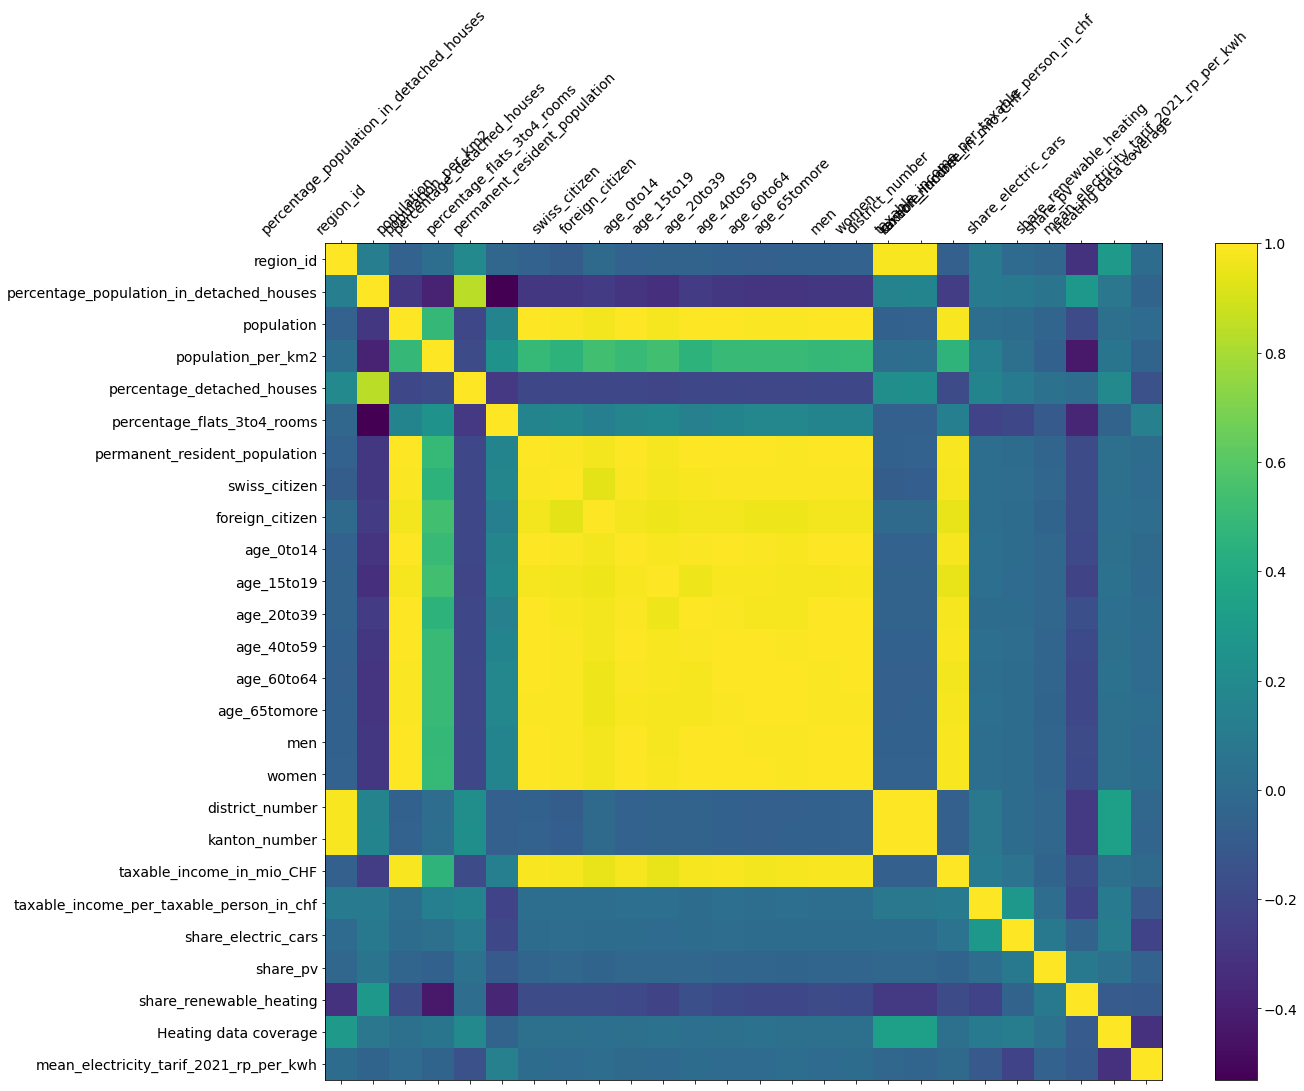

In [26]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_1.corr(), fignum=f.number)
plt.xticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('', fontsize=16);


In [28]:
corr = df_1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,region_id,percentage_population_in_detached_houses,population,population_per_km2,percentage_detached_houses,percentage_flats_3to4_rooms,permanent_resident_population,swiss_citizen,foreign_citizen,age_0to14,age_15to19,age_20to39,age_40to59,age_60to64,age_65tomore,men,women,district_number,kanton_number,taxable_income_in_mio_CHF,taxable_income_per_taxable_person_in_chf,share_electric_cars,share_pv,share_renewable_heating,Heating data coverage,mean_electricity_tarif_2021_rp_per_kwh
region_id,1.00,0.12,-0.05,0.02,0.19,-0.02,-0.05,-0.08,-0.00,-0.05,-0.04,-0.04,-0.06,-0.06,-0.06,-0.05,-0.05,0.98,0.98,-0.06,0.09,0.00,-0.03,-0.31,0.30,0.01
percentage_population_in_detached_houses,0.12,1.00,-0.28,-0.39,0.84,-0.53,-0.28,-0.28,-0.27,-0.29,-0.32,-0.26,-0.29,-0.30,-0.30,-0.28,-0.28,0.16,0.16,-0.26,0.09,0.09,0.06,0.28,0.07,-0.04
population,-0.05,-0.28,1.00,0.49,-0.20,0.16,1.00,0.99,0.97,1.00,0.98,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.02,0.01,-0.03,-0.18,0.03,0.00
population_per_km2,0.02,-0.39,0.49,1.00,-0.18,0.25,0.49,0.46,0.53,0.51,0.54,0.46,0.50,0.50,0.51,0.49,0.50,0.02,0.02,0.47,0.13,0.03,-0.06,-0.42,0.06,-0.04
percentage_detached_houses,0.19,0.84,-0.20,-0.18,1.00,-0.28,-0.20,-0.20,-0.20,-0.20,-0.21,-0.20,-0.20,-0.20,-0.21,-0.20,-0.20,0.23,0.23,-0.18,0.16,0.11,0.04,0.02,0.19,-0.15
percentage_flats_3to4_rooms,-0.02,-0.53,0.16,0.25,-0.28,1.00,0.16,0.17,0.13,0.16,0.18,0.14,0.16,0.18,0.18,0.16,0.16,-0.06,-0.06,0.13,-0.22,-0.20,-0.10,-0.36,-0.05,0.14
permanent_resident_population,-0.05,-0.28,1.00,0.49,-0.20,0.16,1.00,0.99,0.97,1.00,0.98,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.02,0.01,-0.03,-0.18,0.03,0.01
swiss_citizen,-0.08,-0.28,0.99,0.46,-0.20,0.17,0.99,1.00,0.94,0.99,0.97,0.99,0.99,0.99,0.99,0.99,0.99,-0.08,-0.08,0.98,0.02,0.01,-0.03,-0.18,0.03,0.00
foreign_citizen,-0.00,-0.27,0.97,0.53,-0.20,0.13,0.97,0.94,1.00,0.97,0.96,0.97,0.97,0.96,0.96,0.97,0.97,-0.00,-0.00,0.95,0.02,0.01,-0.04,-0.18,0.03,0.02
age_0to14,-0.05,-0.29,1.00,0.51,-0.20,0.16,1.00,0.99,0.97,1.00,0.99,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.03,0.01,-0.03,-0.19,0.03,-0.00


#### Make new columns as percentages: 
These columns don't really make sense in absolute terms 

In [34]:
absolute_vars = ["permanent_resident_population", "swiss_citizen", "foreign_citizen", "age_0to14", "age_15to19", "age_20to39", "age_40to59", "age_60to64", "age_65tomore", "men", "women"]
relative_vars = ["percentage_permanent_resident_population", "percentage_swiss_citizen", "percentage_foreign_citizen", "percentage_age_0to14", 
                 "percentage_age_15to19", "percentage_age_20to39", "percentage_age_40to59", "percentage_age_60to64", "percentage_age_65tomore", "percentage_men", "percentage_women"]

In [36]:
df_2 = df_1

In [46]:
absolute_vars = ["permanent_resident_population", "swiss_citizen", "foreign_citizen", "age_0to14", "age_15to19", "age_20to39", "age_40to59", "age_60to64", "age_65tomore", "men", "women"]
relative_vars = ["percentage_permanent_resident_population", "percentage_swiss_citizen", "percentage_foreign_citizen", "percentage_age_0to14", 
                 "percentage_age_15to19", "percentage_age_20to39", "percentage_age_40to59", "percentage_age_60to64", "percentage_age_65tomore", "percentage_men", "percentage_women"]
df_2 = df_1
for a, r in zip(absolute_vars, relative_vars):
    df_2[r] = df_1[a]/df_1["population"]
df_2

,region_id,region_name,percentage_population_in_detached_houses,population,population_per_km2,percentage_detached_houses,percentage_flats_3to4_rooms,municipality_type,permanent_resident_population,swiss_citizen,foreign_citizen,age_0to14,age_15to19,age_20to39,age_40to59,age_60to64,age_65tomore,men,women,district_number,district_name,kanton_number,kanton_short,kanton_name,taxable_income_in_mio_CHF,taxable_income_per_taxable_person_in_chf,share_electric_cars,share_pv,share_renewable_heating,Heating data coverage,mean_electricity_tarif_2021_rp_per_kwh,percentage_swiss_citizen,percentage_permanent_resident_population,percentage_foreign_citizen,percentage_age_0to14,percentage_age_15to19,percentage_age_20to39,percentage_age_40to59,percentage_age_60to64,percentage_age_65tomore,percentage_men,percentage_women
0,1,Aeugst am Albis,49.555336,1981,250.442478,69.565217,41.900648,Periurbane Gemeinde geringer Dichte (23),1981,1728,253,309,123,391,709,129,320,987,994,101,Affoltern,1,ZH,Zürich,94.4072,105013.57060,0.02731,0.07149,0.6129,0.9928,15.486667,0.872287,1.000000,0.127713,0.155982,0.062090,0.197375,0.357900,0.065119,0.161535,0.498233,0.501767
1,10,Obfelden,42.616626,5721,758.753316,72.784314,52.324195,Periurbane Gemeinde mittlerer Dichte (22),5009,4026,983,883,283,1157,1560,307,819,2501,2508,101,Affoltern,1,ZH,Zürich,158.0976,75105.74822,0.01728,0.04280,0.4325,0.7072,15.486667,0.703723,0.875546,0.171823,0.154344,0.049467,0.202237,0.272680,0.053662,0.143157,0.437161,0.438385
2,100,Stadel,36.837533,2293,177.889837,58.333333,45.512821,Periurbane Gemeinde mittlerer Dichte (22),2205,1905,300,345,130,517,737,141,335,1098,1107,104,Dielsdorf,1,ZH,Zürich,74.0686,73920.75848,0.01727,0.02390,0.4191,0.9885,15.486667,0.830789,0.961622,0.130833,0.150458,0.056694,0.225469,0.321413,0.061491,0.146097,0.478849,0.482774
3,1001,Doppleschwand,31.632653,789,113.525180,42.647059,40.909091,Ländliche zentral gelegene Gemeinde (32),750,714,36,164,54,187,206,31,108,393,357,316,Entlebuch,3,LU,Luzern,13.1697,53318.62348,0.00190,0.07290,0.5942,0.9615,15.367333,0.904943,0.950570,0.045627,0.207858,0.068441,0.237009,0.261090,0.039290,0.136882,0.498099,0.452471
4,1002,Entlebuch,23.524041,3280,57.644991,36.800895,48.755313,Ländliche zentral gelegene Gemeinde (32),3349,3106,243,543,219,898,906,199,584,1733,1616,316,Entlebuch,3,LU,Luzern,72.6600,55170.84282,0.00482,0.08571,0.6174,0.6046,15.367333,0.946951,1.021037,0.074085,0.165549,0.066768,0.273780,0.276220,0.060671,0.178049,0.528354,0.492683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,99,Schöfflisdorf,43.988685,1377,343.391521,70.338983,44.907407,Periurbane Gemeinde mittlerer Dichte (22),1396,1174,222,207,69,283,479,89,269,681,715,104,Dielsdorf,1,ZH,Zürich,54.6657,82080.63063,0.01864,0.02482,0.3616,0.9940,15.486667,0.852578,1.013798,0.161220,0.150327,0.050109,0.205519,0.347858,0.064633,0.195352,0.494553,0.519245
2017,990,Walliswil bei Niederbipp,52.534562,217,147.619048,70.129870,55.833333,Ländliche zentral gelegene Gemeinde (32),224,203,21,25,8,49,65,30,47,109,115,244,Oberaargau,2,BE,Bern / Berne,6.5089,56599.13043,0.02732,0.05957,0.3766,0.6037,21.925714,0.935484,1.032258,0.096774,0.115207,0.036866,0.225806,0.299539,0.138249,0.216590,0.502304,0.529954
2018,991,Walliswil bei Wangen,57.575758,606,197.394137,71.232877,54.487179,Ländliche zentral gelegene Gemeinde (32),578,556,22,64,27,123,192,51,121,286,292,244,Oberaargau,2,BE,Bern / Berne,16.8741,59207.36842,0.00671,0.05395,0.3761,0.9955,21.925714,0.917492,0.953795,0.036304,0.105611,0.044554,0.202970,0.316832,0.084158,0.199670,0.471947,0.481848
2019,992,Wangen an der Aare,37.056055,2321,444.636015,59.897611,57.797428,Ländliche zentral gelegene Gemeinde (32),2274,1963,311,333,121,592,676,127,425,1124,1150,244,Oberaargau,2,BE,Bern / Berne,61.6100,61242.54473,0.00672,0.06549,0.2902,0.9653,21.925714,0.845756,0.979750,0.133994,0.143473,0.052133,0

In [45]:
for a, r in zip(absolute_vars, relative_vars):
    print(a, r)

permanent_resident_population percentage_permanent_resident_population
swiss_citizen percentage_swiss_citizen
foreign_citizen percentage_foreign_citizen
age_0to14 percentage_age_0to14
age_15to19 percentage_age_15to19
age_20to39 percentage_age_20to39
age_40to59 percentage_age_40to59
age_60to64 percentage_age_60to64
age_65tomore percentage_age_65tomore
men percentage_men
women percentage_women


In [40]:
corr = df_2.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,region_id,percentage_population_in_detached_houses,population,population_per_km2,percentage_detached_houses,percentage_flats_3to4_rooms,permanent_resident_population,swiss_citizen,foreign_citizen,age_0to14,age_15to19,age_20to39,age_40to59,age_60to64,age_65tomore,men,women,district_number,kanton_number,taxable_income_in_mio_CHF,taxable_income_per_taxable_person_in_chf,share_electric_cars,share_pv,share_renewable_heating,Heating data coverage,mean_electricity_tarif_2021_rp_per_kwh,percentage_swiss_citizen,percentage_permanent_resident_population,percentage_foreign_citizen,percentage_age_0to14,percentage_age_15to19,percentage_age_20to39,percentage_age_40to59,percentage_age_60to64,percentage_age_65tomore,percentage_men,percentage_women
region_id,1.00,0.12,-0.05,0.02,0.19,-0.02,-0.05,-0.08,-0.00,-0.05,-0.04,-0.04,-0.06,-0.06,-0.06,-0.05,-0.05,0.98,0.98,-0.06,0.09,0.00,-0.03,-0.31,0.30,0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
percentage_population_in_detached_houses,0.12,1.00,-0.28,-0.39,0.84,-0.53,-0.28,-0.28,-0.27,-0.29,-0.32,-0.26,-0.29,-0.30,-0.30,-0.28,-0.28,0.16,0.16,-0.26,0.09,0.09,0.06,0.28,0.07,-0.04,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07,-0.07
population,-0.05,-0.28,1.00,0.49,-0.20,0.16,1.00,0.99,0.97,1.00,0.98,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.02,0.01,-0.03,-0.18,0.03,0.00,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
population_per_km2,0.02,-0.39,0.49,1.00,-0.18,0.25,0.49,0.46,0.53,0.51,0.54,0.46,0.50,0.50,0.51,0.49,0.50,0.02,0.02,0.47,0.13,0.03,-0.06,-0.42,0.06,-0.04,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
percentage_detached_houses,0.19,0.84,-0.20,-0.18,1.00,-0.28,-0.20,-0.20,-0.20,-0.20,-0.21,-0.20,-0.20,-0.20,-0.21,-0.20,-0.20,0.23,0.23,-0.18,0.16,0.11,0.04,0.02,0.19,-0.15,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10
percentage_flats_3to4_rooms,-0.02,-0.53,0.16,0.25,-0.28,1.00,0.16,0.17,0.13,0.16,0.18,0.14,0.16,0.18,0.18,0.16,0.16,-0.06,-0.06,0.13,-0.22,-0.20,-0.10,-0.36,-0.05,0.14,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
permanent_resident_population,-0.05,-0.28,1.00,0.49,-0.20,0.16,1.00,0.99,0.97,1.00,0.98,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.02,0.01,-0.03,-0.18,0.03,0.01,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
swiss_citizen,-0.08,-0.28,0.99,0.46,-0.20,0.17,0.99,1.00,0.94,0.99,0.97,0.99,0.99,0.99,0.99,0.99,0.99,-0.08,-0.08,0.98,0.02,0.01,-0.03,-0.18,0.03,0.00,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
foreign_citizen,-0.00,-0.27,0.97,0.53,-0.20,0.13,0.97,0.94,1.00,0.97,0.96,0.97,0.97,0.96,0.96,0.97,0.97,-0.00,-0.00,0.95,0.02,0.01,-0.04,-0.18,0.03,0.02,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
age_0to14,-0.05,-0.29,1.00,0.51,-0.20,0.16,1.00,0.99,0.97,1.00,0.99,0.99,1.00,0.99,0.99,1.00,1.00,-0.05,-0.05,0.98,0.03,0.01,-0.03,-0.19,0.03,-0.00,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


Data to get: 
Spatial data (elevation, temperature, coordinates, rain)
demographic_data 
### data found here: `https://www.diva-gis.org/datadown `


In [ ]:
## Save 

In [48]:
df_2

,region_id,region_name,percentage_population_in_detached_houses,population,population_per_km2,percentage_detached_houses,percentage_flats_3to4_rooms,municipality_type,permanent_resident_population,swiss_citizen,foreign_citizen,age_0to14,age_15to19,age_20to39,age_40to59,age_60to64,age_65tomore,men,women,district_number,district_name,kanton_number,kanton_short,kanton_name,taxable_income_in_mio_CHF,taxable_income_per_taxable_person_in_chf,share_electric_cars,share_pv,share_renewable_heating,Heating data coverage,mean_electricity_tarif_2021_rp_per_kwh,percentage_swiss_citizen,percentage_permanent_resident_population,percentage_foreign_citizen,percentage_age_0to14,percentage_age_15to19,percentage_age_20to39,percentage_age_40to59,percentage_age_60to64,percentage_age_65tomore,percentage_men,percentage_women
0,1,Aeugst am Albis,49.555336,1981,250.442478,69.565217,41.900648,Periurbane Gemeinde geringer Dichte (23),1981,1728,253,309,123,391,709,129,320,987,994,101,Affoltern,1,ZH,Zürich,94.4072,105013.57060,0.02731,0.07149,0.6129,0.9928,15.486667,0.872287,1.000000,0.127713,0.155982,0.062090,0.197375,0.357900,0.065119,0.161535,0.498233,0.501767
1,10,Obfelden,42.616626,5721,758.753316,72.784314,52.324195,Periurbane Gemeinde mittlerer Dichte (22),5009,4026,983,883,283,1157,1560,307,819,2501,2508,101,Affoltern,1,ZH,Zürich,158.0976,75105.74822,0.01728,0.04280,0.4325,0.7072,15.486667,0.703723,0.875546,0.171823,0.154344,0.049467,0.202237,0.272680,0.053662,0.143157,0.437161,0.438385
2,100,Stadel,36.837533,2293,177.889837,58.333333,45.512821,Periurbane Gemeinde mittlerer Dichte (22),2205,1905,300,345,130,517,737,141,335,1098,1107,104,Dielsdorf,1,ZH,Zürich,74.0686,73920.75848,0.01727,0.02390,0.4191,0.9885,15.486667,0.830789,0.961622,0.130833,0.150458,0.056694,0.225469,0.321413,0.061491,0.146097,0.478849,0.482774
3,1001,Doppleschwand,31.632653,789,113.525180,42.647059,40.909091,Ländliche zentral gelegene Gemeinde (32),750,714,36,164,54,187,206,31,108,393,357,316,Entlebuch,3,LU,Luzern,13.1697,53318.62348,0.00190,0.07290,0.5942,0.9615,15.367333,0.904943,0.950570,0.045627,0.207858,0.068441,0.237009,0.261090,0.039290,0.136882,0.498099,0.452471
4,1002,Entlebuch,23.524041,3280,57.644991,36.800895,48.755313,Ländliche zentral gelegene Gemeinde (32),3349,3106,243,543,219,898,906,199,584,1733,1616,316,Entlebuch,3,LU,Luzern,72.6600,55170.84282,0.00482,0.08571,0.6174,0.6046,15.367333,0.946951,1.021037,0.074085,0.165549,0.066768,0.273780,0.276220,0.060671,0.178049,0.528354,0.492683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,99,Schöfflisdorf,43.988685,1377,343.391521,70.338983,44.907407,Periurbane Gemeinde mittlerer Dichte (22),1396,1174,222,207,69,283,479,89,269,681,715,104,Dielsdorf,1,ZH,Zürich,54.6657,82080.63063,0.01864,0.02482,0.3616,0.9940,15.486667,0.852578,1.013798,0.161220,0.150327,0.050109,0.205519,0.347858,0.064633,0.195352,0.494553,0.519245
2017,990,Walliswil bei Niederbipp,52.534562,217,147.619048,70.129870,55.833333,Ländliche zentral gelegene Gemeinde (32),224,203,21,25,8,49,65,30,47,109,115,244,Oberaargau,2,BE,Bern / Berne,6.5089,56599.13043,0.02732,0.05957,0.3766,0.6037,21.925714,0.935484,1.032258,0.096774,0.115207,0.036866,0.225806,0.299539,0.138249,0.216590,0.502304,0.529954
2018,991,Walliswil bei Wangen,57.575758,606,197.394137,71.232877,54.487179,Ländliche zentral gelegene Gemeinde (32),578,556,22,64,27,123,192,51,121,286,292,244,Oberaargau,2,BE,Bern / Berne,16.8741,59207.36842,0.00671,0.05395,0.3761,0.9955,21.925714,0.917492,0.953795,0.036304,0.105611,0.044554,0.202970,0.316832,0.084158,0.199670,0.471947,0.481848
2019,992,Wangen an der Aare,37.056055,2321,444.636015,59.897611,57.797428,Ländliche zentral gelegene Gemeinde (32),2274,1963,311,333,121,592,676,127,425,1124,1150,244,Oberaargau,2,BE,Bern / Berne,61.6100,61242.54473,0.00672,0.06549,0.2902,0.9653,21.925714,0.845756,0.979750,0.133994,0.143473,0.052133,0

In [49]:
data_path = '/content/gdrive/My Drive/ENERGY_CLIMATE_HACK/raw_data/'
df_2.to_csv(f'{data_path}df_processed_dj.csv')